In [83]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [84]:
X, y = boston.data, boston.target
X.shape, y.shape

((506, 13), (506,))

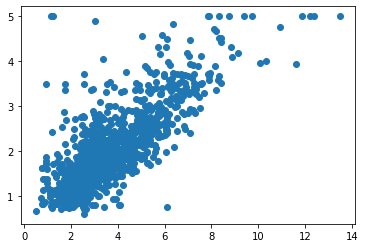

In [85]:
from sklearn import datasets, linear_model
X, y = datasets.fetch_california_housing(return_X_y=True)
X = X[:,0:1]
X = X[:1000] #defini um escopo pq é muito
y = y[:1000]
X12 = X
plt.scatter(X12,y)
plt.show()

In [86]:
def mae(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yAbs = abs(yDiff)
    errorSum = sum(yAbs)
    mae = errorSum/len(yAbs)
    return mae
ypred = modelo_linear(X12, -1, 40)
mae(y, ypred)

array([34.06182058])

In [87]:
def mse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return mse
ypred = modelo_linear(X12, -1, 40)
mse(y, ypred)

array([1166.74753725])

In [88]:
from math import sqrt
def rmse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return sqrt(mse)
ypred = modelo_linear(X12, -1, 40)
rmse(y, ypred)

34.157686356736455

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, ypred):
    mse = mean_squared_error(y,ypred)
    return sqrt(mse)
ypred = modelo_linear(X12, -1, 40)
rmse(y, ypred)

34.15768635673648

rmse: 2.276353632896523
fitado rmse: 0.5714547695801857


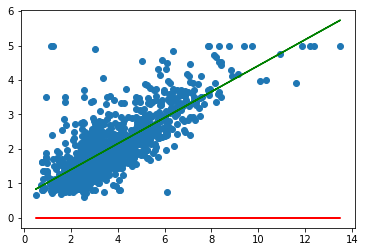

array([[0.64693771],
       [0.37684951]])

In [99]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print('rmse:',rmse(y,ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print('fitado rmse:',rmse(y,ypred))
plt.plot(X12, ypred, 'g')
plt.show()
modelo.w

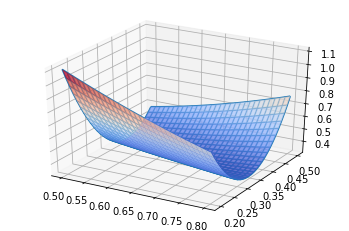

In [91]:
from sklearn.metrics import mean_squared_error
import numpy as np
w0 = np.linspace(0.50, 0.80, 30)
w1 = np.linspace(0.20, 0.50, 30)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75,
                cmap='coolwarm', edgecolor='none')

plt.show()

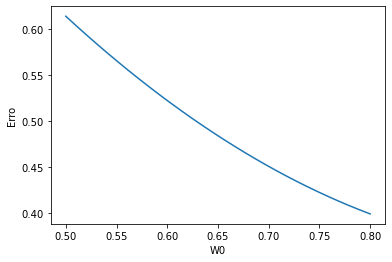

In [92]:
plt.ylabel("Erro")
plt.xlabel("W0")
i=8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

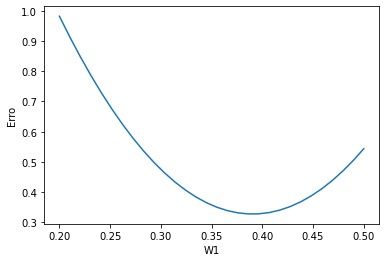

In [93]:
plt.ylabel("Erro")
plt.xlabel("W1")
i=8
plt.plot(W1[:,i],Erro[:,i])
plt.show()

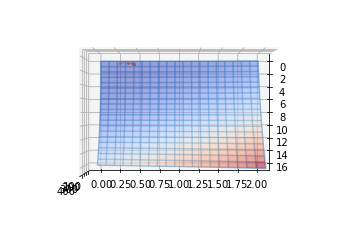

In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        self.wh = []
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(20):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste
            ypred = self.predict(X)
            mse = mean_squared_error(y, ypred)
            self.wh.append([self.w[0,0], self.w[1,0], mse])

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

w0 = np.linspace(0, 16, 20)
w1 = np.linspace(0, 2, 20)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5,
                cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X12,y)
ypred = modelo.predict(X12)
wh = np.array(modelo.wh)
ax.plot(wh[:,0],wh[:,1],wh[:,2], marker='o', linewidth='0.5', markersize=2)
ax.view_init(azim=0, elev=90)

plt.show()

In [95]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

In [96]:
modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
print(modelo.w)

0.3265605536759431
[[0.64693771]
 [0.37684951]]


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

0.32656055110726806
0.6470563297610266 [0.3768234]


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

0.32656055110726806
0.6470563297610266 [0.3768234]
